In [63]:
# %pip install keras
# %pip install tensorflow
# %pip install image_dataset_loader

import keras
import os
from keras.models import *
from keras.layers import *
from keras.datasets import cifar10
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from keras.utils import *
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

from image_dataset_loader import load


# train_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/train/")
# validation_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/val/")
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v3/test/")


train_data_dir = os.path.dirname("output_path/train/")
validation_data_dir = os.path.dirname("output_path/val/")
test_data_dir = os.path.dirname("output_path/test/")

In [64]:

img_width, img_height = 224, 224
batch_size = 16

datagenerate_train = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)
                                
train_generator = datagenerate_train.flow_from_directory(train_data_dir,
                                                target_size=(img_width,img_height),
                                                 batch_size=batch_size,
                                                 #subset="training",
                                                 class_mode='categorical',
                                                 shuffle = True)

datagenerate_validation = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

validation_generator = datagenerate_validation.flow_from_directory(validation_data_dir,
                                                        target_size=(img_width,img_height),
                                                        batch_size=batch_size,
                                                        #subset="validation",
                                                        class_mode='categorical',
                                                        shuffle = True)


print(train_generator)
print(validation_generator)
# print(test_generator)

Found 816 images belonging to 7 classes.
Found 101 images belonging to 7 classes.


# The Model

In [65]:
def define_VGGmodel():

    model = VGG19(include_top=False, input_shape=(img_width, img_height, 3))

    for layer in model.layers:
        layer.trainable = False

    flat1 = Flatten()(model.layers[-1].output)

    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)

    output = Dense(7, activation='softmax')(class1)

    model = Model(inputs=model.inputs, outputs=output)

    # opt = SGD(lr=0.001, momentum=0.9)

    model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    
    return model

model = define_VGGmodel()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [66]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

In [67]:
history = model.fit(train_generator, steps_per_epoch=len(train_generator), validation_data=validation_generator,
 validation_steps=len(validation_generator), epochs=25 , verbose=1, shuffle=False, callbacks=[earlystopping])

Epoch 1/25
51/51 [==============================] - 107s 2s/step - loss: 2.7740 - categorical_accuracy: 0.3284 - val_loss: 1.4267 - val_categorical_accuracy: 0.3762
Epoch 2/25
51/51 [==============================] - 103s 2s/step - loss: 0.9062 - categorical_accuracy: 0.7304 - val_loss: 0.8303 - val_categorical_accuracy: 0.7228
Epoch 3/25
51/51 [==============================] - 104s 2s/step - loss: 0.5229 - categorical_accuracy: 0.8603 - val_loss: 0.6915 - val_categorical_accuracy: 0.7921
Epoch 4/25
51/51 [==============================] - 103s 2s/step - loss: 0.3845 - categorical_accuracy: 0.9179 - val_loss: 0.5404 - val_categorical_accuracy: 0.8515
Epoch 5/25
51/51 [==============================] - 103s 2s/step - loss: 0.2504 - categorical_accuracy: 0.9657 - val_loss: 0.5066 - val_categorical_accuracy: 0.8020
Epoch 6/25
51/51 [==============================] - 102s 2s/step - loss: 0.2171 - categorical_accuracy: 0.9596 - val_loss: 0.5297 - val_categorical_accuracy: 0.8119
Epoch 7/25

In [74]:
print(history.history)

{'loss': [2.7739646434783936, 0.9061941504478455, 0.5228520035743713, 0.3845042288303375, 0.2504223883152008, 0.21706250309944153, 0.12316638231277466, 0.1014617457985878, 0.07829178124666214, 0.058207619935274124, 0.044297050684690475, 0.03994014114141464, 0.03697099909186363, 0.03082170896232128, 0.023742062970995903, 0.020789748057723045, 0.01747950166463852, 0.01607891172170639, 0.014273565262556076, 0.012062587775290012, 0.011521569453179836, 0.009712629951536655, 0.008554537780582905, 0.008041616529226303, 0.0074010626412928104], 'categorical_accuracy': [0.3284313678741455, 0.7303921580314636, 0.8602941036224365, 0.9178921580314636, 0.9656862616539001, 0.9595588445663452, 0.9938725233078003, 0.9926470518112183, 0.9950980544090271, 0.998774528503418, 1.0, 1.0, 0.998774528503418, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'val_loss': [1.4266644716262817, 0.8302668333053589, 0.6915204524993896, 0.5404296517372131, 0.5065749883651733, 0.529689610004425, 0.3580323755

# Diagnostic plot

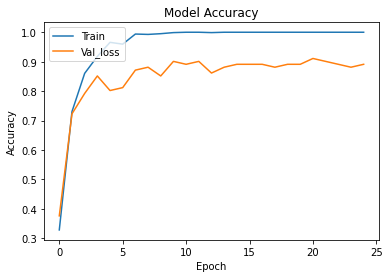

In [75]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val_loss'], loc='upper left')
plt.show()

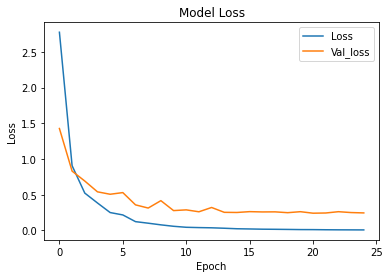

In [76]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_loss'], loc='upper right')
plt.show()

In [77]:
print('Validation image - evaluation')
_, acc = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('accuracy score: ', acc*100 )

Validation image - evaluation
7/7 [==============================] - 11s 2s/step - loss: 0.2453 - categorical_accuracy: 0.8911
accuracy score:  89.10890817642212


In [93]:
model.save('VGG19-accu-score-92%')

#model=load_model('vgg15-softmax-classifier_train-91.54_val-72.06_test-83.82%')

INFO:tensorflow:Assets written to: VGG19-accu-score-92%\assets


INFO:tensorflow:Assets written to: VGG19-accu-score-92%\assets


In [78]:
# print('Test image - evaluation')
# _, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
# print('accuracy score: ', acc*100 )

# Testing

In [80]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v1/train-test/")

datagenerate_test = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

test_generator = datagenerate_test.flow_from_directory(test_data_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                #subset="validation",
                                                class_mode='categorical',
                                                shuffle = False)

Found 103 images belonging to 7 classes.


In [81]:
# loaded_model = load_model("model/VGG16_adam_train-89.11%_val-89.10_test-91.26v2%")


# from sklearn.metrics import accuracy_score
# import seaborn as sns

# y_pred=loaded_model.predict(test_generator)
# y_pred=np.argmax(y_pred,axis=1)
# # accuracy_score(y_pred,test_generator.classes)
# print(y_pred)

# print(classification_report(y_pred,test_generator.classes))
# print('Accuracy Score :',accuracy_score(test_generator.classes, y_pred))

In [82]:
print('Test image - evaluation')
_, acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('accuracy score: ', acc*100 )

Test image - evaluation
7/7 [==============================] - 11s 2s/step - loss: 0.2774 - categorical_accuracy: 0.9223
accuracy score:  92.23300814628601


In [83]:

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('accuracy: ', metrics.accuracy_score(y_pred,test_generator.classes))

7/7 [==============================] - 12s 2s/step
accuracy:  0.9223300970873787


In [84]:
print('Confusion Matrix')
print(confusion_matrix(y_pred, test_generator.classes))

Confusion Matrix
[[13  1  0  0  1  1  0]
 [ 1 16  0  0  1  0  0]
 [ 0  0 11  0  0  0  0]
 [ 0  0  0  9  0  0  0]
 [ 0  0  0  0 16  0  0]
 [ 0  1  1  0  0 17  1]
 [ 0  0  0  0  0  0 13]]


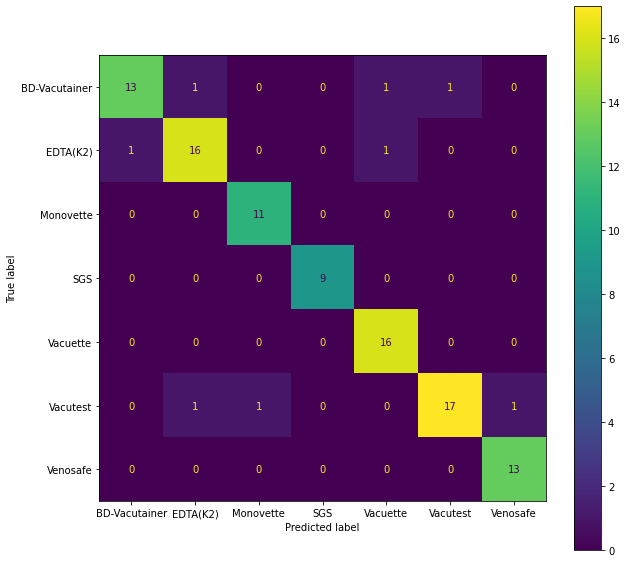

In [85]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_pred, test_generator.classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=[ 'BD-Vacutainer', 'EDTA(K2)', 'Monovette','SGS', 'Vacuette' , 'Vacutest', 'Venosafe'])
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(False)
cmd.plot(ax=ax)

In [86]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy Score :', accuracy_score(y_pred, test_generator.classes)) 
print ('Report : ')
target_names = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe']
print (classification_report(y_pred, test_generator.classes, target_names=target_names)) 

Accuracy Score : 0.9223300970873787
Report : 
               precision    recall  f1-score   support

BD-Vacutainer       0.93      0.81      0.87        16
     EDTA(K2)       0.89      0.89      0.89        18
    Monovette       0.92      1.00      0.96        11
          SGS       1.00      1.00      1.00         9
     Vacuette       0.89      1.00      0.94        16
     Vacutest       0.94      0.85      0.89        20
     Venosafe       0.93      1.00      0.96        13

     accuracy                           0.92       103
    macro avg       0.93      0.94      0.93       103
 weighted avg       0.92      0.92      0.92       103



The Accuracy score is 15.53%, this could be due to the image. One of the plausible issues i can think of that cause such a low accuracy is the fact that maybe tht augmented image has not been since by the model.


#### Test an image


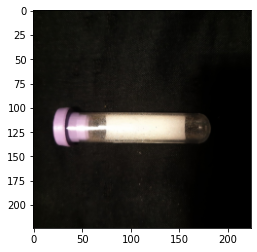

In [ ]:
from skimage.transform import resize
Image = plt.imread("output_path/test/BD-Vacutainer/BD-Vacutainer1_small_constrast.jpg")
RImage = resize(Image, (img_width, img_height, 3))
img = plt.imshow(RImage)

In [ ]:
predictions = model.predict(np.array( [RImage] ))
predictions

y_pred = np.argmax(predictions, axis=1)

print(y_pred)
# should give 0 as it is vacutainer

1/1 [==============================] - 0s 237ms/step
[0]


## testing with loops

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# test_data_dir = os.path.dirname("output_path_no_Plain_220x380v1/train-test/")

datagenerate_test = ImageDataGenerator(rescale=1.0/255, samplewise_center=True)

test_generator = datagenerate_test.flow_from_directory(test_data_dir,
                                                target_size=(img_width,img_height),
                                                batch_size=batch_size,
                                                #subset="validation",
                                                class_mode='categorical',
                                                classes = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe'],
                                                shuffle = False)

Found 103 images belonging to 7 classes.


In [ ]:
loaded_model = load_model("model/VGG16_adam_train-89.11%_val-89.10_test-91.26v2%")


from sklearn.metrics import accuracy_score
import seaborn as sns

y_pred=loaded_model.predict(test_generator)
y_pred=np.argmax(y_pred,axis=1)

print(y_pred)

7/7 [==============================] - 10s 1s/step
[6 6 6 6 6 1 5 6 6 5 5 5 5 6 6 6 6 5 6 5 6 5 5 5 6 6 5 6 5 6 6 6 6 6 6 6 5
 0 4 6 0 2 0 2 6 6 6 6 6 5 6 4 6 6 6 6 6 6 6 6 4 5 5 5 6 5 6 6 5 4 0 6 6 6
 5 5 5 5 5 5 5 5 5 5 6 6 0 5 5 6 6 6 5 6 5 6 6 6 6 5 6 5 6]


In [ ]:
def fix_prediction_order(prediction):
    if len(prediction) <= len(test_generator.classes):
        return prediction

    return np.roll(prediction, len(test_generator.classes), axis = 0)

organize = fix_prediction_order(y_pred)
print(organize)

[6 6 6 6 6 1 5 6 6 5 5 5 5 6 6 6 6 5 6 5 6 5 5 5 6 6 5 6 5 6 6 6 6 6 6 6 5
 0 4 6 0 2 0 2 6 6 6 6 6 5 6 4 6 6 6 6 6 6 6 6 4 5 5 5 6 5 6 6 5 4 0 6 6 6
 5 5 5 5 5 5 5 5 5 5 6 6 0 5 5 6 6 6 5 6 5 6 6 6 6 5 6 5 6]


In [ ]:
t=test_generator.classes
print(t)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [ ]:
accuracy_score(y_pred ,test_generator.classes)


0.2524271844660194

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('Accuracy Score :', accuracy_score(y_pred, test_generator.classes)) 
print ('Report : ')
target_names = ['BD-Vacutainer', 'EDTA(K2)', 'Monovette', 'SGS', 'Vacuette' , 'Vacutest', 'Venosafe']
print (classification_report(y_pred, test_generator.classes)) 

Accuracy Score : 0.2524271844660194
Report : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.17      1.00      0.29         2
           3       0.00      0.00      0.00         0
           4       0.11      0.50      0.18         4
           5       0.67      0.34      0.45        35
           6       0.71      0.18      0.29        56

    accuracy                           0.25       103
   macro avg       0.24      0.29      0.17       103
weighted avg       0.62      0.25      0.32       103



c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Stephen Pangga\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,